# 13.1 Bitly Data from 1.USA.gov

In [50]:
import json

In [51]:
path = "./datasets/bitly_usagov/example.txt"
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [52]:
with open(path) as f:
    records = [json.loads(line) for line in f] 
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [53]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]

In [54]:
#time_zones

In [55]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

counts = get_counts(time_zones)

In [56]:
len(time_zones)

3440

In [57]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [58]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [59]:
from collections import Counter

In [60]:
counts = Counter(time_zones)

In [61]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [62]:
import pandas as pd
frame = pd.DataFrame(records)

In [63]:
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [64]:
frame.info()

<class 'pandas.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   str    
 1   c            2919 non-null   str    
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   str    
 4   gr           2919 non-null   str    
 5   g            3440 non-null   str    
 6   h            3440 non-null   str    
 7   l            3440 non-null   str    
 8   al           3094 non-null   str    
 9   hh           3440 non-null   str    
 10  r            3440 non-null   str    
 11  u            3440 non-null   str    
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   str    
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     str    
dtypes: float64(4), object(1), str(13)
memory usage: 1.4+ MB


In [65]:
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: str

In [66]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [67]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

<Axes: ylabel='tz'>

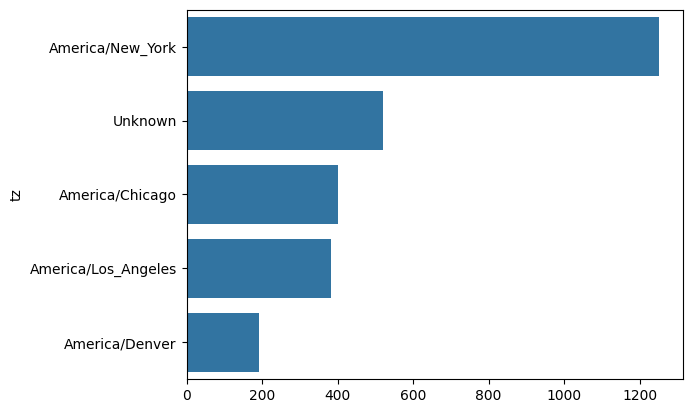

In [68]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

In [69]:
frame["a"][1]

'GoogleMaps/RochesterNY'

In [70]:
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [71]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: str

In [72]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [73]:
cframe = frame[frame["a"].notna()].copy()

In [74]:
import numpy as np
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: str

In [75]:
by_tz_os = cframe.groupby(["tz", "os"])

In [76]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [77]:
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [78]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

/tmp/ipykernel_220415/1535319149.py:1: Pandas4Warning: Starting with pandas version 4.0 all arguments of sum will be keyword-only.
  indexer = agg_counts.sum("columns").argsort()


array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [79]:
count_subset = agg_counts.take(indexer[-10:])

In [80]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [81]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [82]:
count_subset = count_subset
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)

os,tz,Not Windows,Windows
0,America/Sao_Paulo,13.0,20.0
1,Europe/Madrid,16.0,19.0
2,Pacific/Honolulu,0.0,36.0
3,Asia/Tokyo,2.0,35.0
4,Europe/London,43.0,31.0
5,America/Denver,132.0,59.0
6,America/Los_Angeles,130.0,252.0
7,America/Chicago,115.0,285.0
8,,245.0,276.0
9,America/New_York,339.0,912.0


In [83]:
#sns.barplot(x="total", y="tz", hue="os", data=count_subset)

In [84]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

In [87]:
#results = count_subset.groupby("tz").apply(norm_total)
#sns.barplot(x="normed_total", y="tz", hue="os", data=results) 

In [90]:
#g = count_subset.groupby("tz")
#results2=count_subset["total"] / g["total"].transform("sum")

# 13.2 MovieLens 1M Dataset

In [91]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::", header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings= pd.read_table("datasets/movielens/ratings.dat", sep="::", header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::", header=None, names=mnames, engine="python")

In [92]:
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [93]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [94]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [95]:
data = pd.merge(pd.merge(ratings, users), movies)

In [96]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [97]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [107]:
mean_ratings = data.pivot_table("rating", index="title", columns="gender", aggfunc="mean")

In [108]:
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [109]:
ratings_by_title = data.groupby("title").size()

In [110]:
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [111]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [112]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='str', name='title', length=1216)

In [113]:
mean_ratings = mean_ratings.loc[active_titles]


In [114]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [116]:
top_femal_ratings = mean_ratings.sort_values("F", ascending=False)

In [117]:
top_femal_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [118]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [119]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [121]:
sorted_by_diff[::-1].head()
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [122]:
rating_std_by_title

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
                                       ...   
Young Guns (1988)                    1.017437
Young Guns II (1990)                 1.071959
Young Sherlock Holmes (1985)         0.891176
Zero Effect (1998)                   1.042932
eXistenZ (1999)                      1.178568
Name: rating, Length: 1216, dtype: float64

In [123]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [124]:
movies["genres"].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: str

In [125]:
movies["genres"].head().str.split("|")
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [126]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [127]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)

In [128]:
ratings_with_genre.iloc[0]

movie_id                     1
title         Toy Story (1995)
genre                Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

In [130]:
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])["rating"].mean().unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


# 13.4 USDA Food database

In [131]:
import json 
db = json.load(open("datasets/usda_food/database.json"))

len(db)

6636

In [132]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [133]:
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head()

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy


In [134]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [135]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [136]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [137]:
nutrients.duplicated().sum()

np.int64(14179)

In [138]:
nutrients = nutrients.drop_duplicates()

In [139]:
col_mapping = {"description" : "food", "group" :"fgroup"}
info = info.rename(columns=col_mapping, copy=False)

/tmp/ipykernel_220415/919366286.py:2: Pandas4Warning: The copy keyword is deprecated and will be removed in a future version. Copy-on-Write is active in pandas since 3.0 which utilizes a lazy copy mechanism that defers copies until necessary. Use .copy() to make an eager copy if necessary.
  info = info.rename(columns=col_mapping, copy=False)


In [140]:
col_mapping = {"description": "nutrient", "group": "nutgroup"}

nutrients = nutrients.rename(columns=col_mapping, copy=False)

/tmp/ipykernel_220415/1113947286.py:3: Pandas4Warning: The copy keyword is deprecated and will be removed in a future version. Copy-on-Write is active in pandas since 3.0 which utilizes a lazy copy mechanism that defers copies until necessary. Use .copy() to make an eager copy if necessary.
  nutrients = nutrients.rename(columns=col_mapping, copy=False)


In [141]:
ndata = pd.merge(nutrients, info, on="id")

<Axes: ylabel='fgroup'>

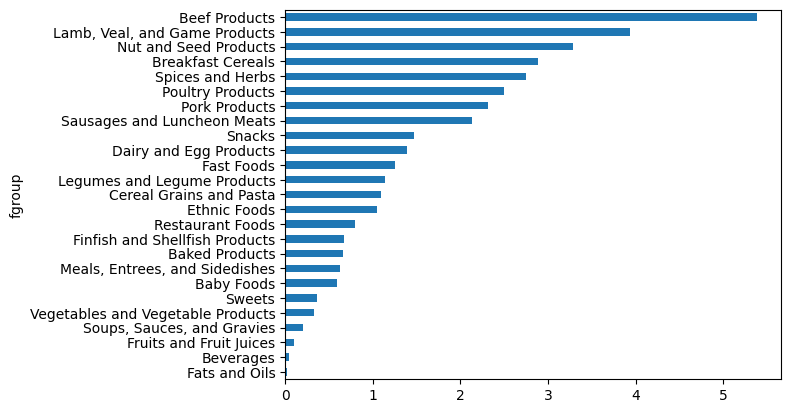

In [143]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh")

In [144]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]
    
max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]
# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

In [146]:
max_foods.loc["Amino Acids"]["food"]

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

# 13.5 2012 Federal Election Commission Database

In [148]:
fec = pd.read_csv("./datasets/fec/P00000001-ALL.csv", low_memory=False)

In [149]:
fec.info()

<class 'pandas.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  str    
 1   cand_id            1001731 non-null  str    
 2   cand_nm            1001731 non-null  str    
 3   contbr_nm          1001731 non-null  str    
 4   contbr_city        1001712 non-null  str    
 5   contbr_st          1001727 non-null  str    
 6   contbr_zip         1001620 non-null  str    
 7   contbr_employer    988002 non-null   str    
 8   contbr_occupation  993301 non-null   str    
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  str    
 11  receipt_desc       14166 non-null    str    
 12  memo_cd            92482 non-null    str    
 13  memo_text          97770 non-null    str    
 14  form_tp            1001731 non-null  str    
 15  file_num           1001731 non-null  int64 

In [150]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [151]:
unique_cands = fec["cand_nm"].unique()
unique_cands

<ArrowStringArray>
[            'Bachmann, Michelle',                   'Romney, Mitt',
                  'Obama, Barack', 'Roemer, Charles E. 'Buddy' III',
              'Pawlenty, Timothy',             'Johnson, Gary Earl',
                      'Paul, Ron',                 'Santorum, Rick',
                   'Cain, Herman',                 'Gingrich, Newt',
           'McCotter, Thaddeus G',                  'Huntsman, Jon',
                    'Perry, Rick']
Length: 13, dtype: str

In [152]:
parties = {"Bachmann, Michelle": "Republican",
"Cain, Herman": "Republican",
"Gingrich, Newt": "Republican",
"Huntsman, Jon": "Republican",
"Johnson, Gary Earl": "Republican",
"McCotter, Thaddeus G": "Republican",
"Obama, Barack": "Democrat",
"Paul, Ron": "Republican",
"Pawlenty, Timothy": "Republican",
"Perry, Rick": "Republican",
"Roemer, Charles E. 'Buddy' III": "Republican",
"Romney, Mitt": "Republican",
"Santorum, Rick": "Republican"}

In [154]:
fec["cand_nm"][123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: str

In [155]:
fec["cand_nm"][123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: str

In [156]:
fec["party"] = fec["cand_nm"].map(parties)

In [157]:
fec["party"].value_counts()

party
Democrat      593746
Republican    407985
Name: count, dtype: int64

In [158]:
fec = fec[fec["contb_receipt_amt"] > 0]
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

In [159]:
fec["contbr_occupation"].value_counts()[:10]

contbr_occupation
RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: count, dtype: int64

In [169]:
occ_mapping = {
"INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
"INFORMATION REQUESTED" : "NOT PROVIDED",
"INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
"C.E.O.": "CEO"
}

In [176]:
def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)
fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

In [172]:
emp_mapping = {
"INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
"INFORMATION REQUESTED" : "NOT PROVIDED",
"SELF" : "SELF-EMPLOYED",
"SELF EMPLOYED" : "SELF-EMPLOYED",
}


In [177]:
def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)
fec["contbr_employer"] = fec["contbr_employer"].map(emp_mapping)

In [179]:
by_occupation = fec.pivot_table("contb_receipt_amt", index="contbr_occupation", columns="party", aggfunc="sum")

In [180]:
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2_000_000]

In [181]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


<Axes: ylabel='contbr_occupation'>

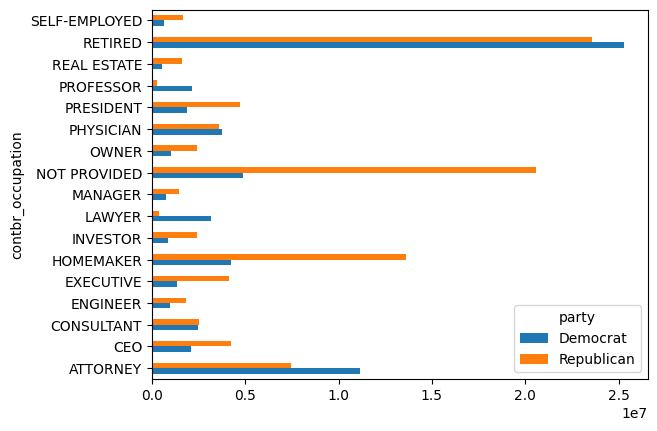

In [182]:
over_2mm.plot(kind="barh")

In [183]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

In [184]:
grouped = fec_mrbo.groupby("cand_nm")
grouped.apply(get_top_amounts, "contbr_occupation", n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [185]:
grouped.apply(get_top_amounts, "contbr_employer", n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [187]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [189]:
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [191]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis="index")
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


<Axes: ylabel='contb_receipt_amt'>

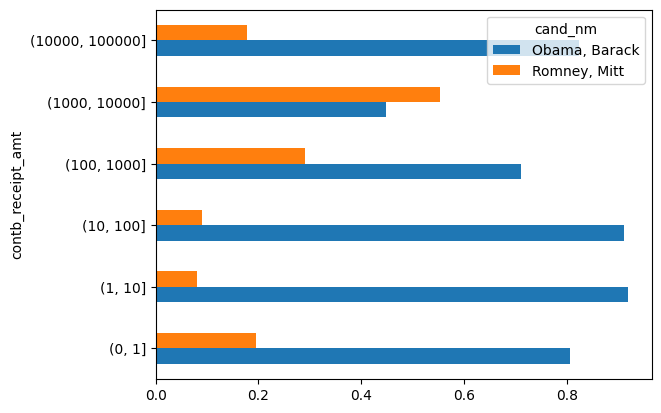

In [192]:
normed_sums[:-2].plot(kind="barh")

In [194]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100_000]
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [196]:
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


# 13.3 US Baby Names 1880-2010

In [76]:
import numpy as np
import pandas as pd 
import seaborn as sns


In [77]:
names1880 = pd.read_csv("datasets/babynames/yob1880.txt", names=["name", "sex", "births"])

In [78]:
names1880.groupby("sex")["births"].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [79]:
pieces = []
for year in range(1880, 2025):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    frame["year"] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

In [80]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2147624,Zylyn,M,5,2024
2147625,Zymiere,M,5,2024
2147626,Zypher,M,5,2024
2147627,Zyre,M,5,2024


In [81]:
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)

In [82]:
total_births.tail()

sex,F,M
year,,
2020,1615512,1725065
2021,1639712,1748237
2022,1638762,1744373
2023,1602645,1708551
2024,1613188,1715313


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

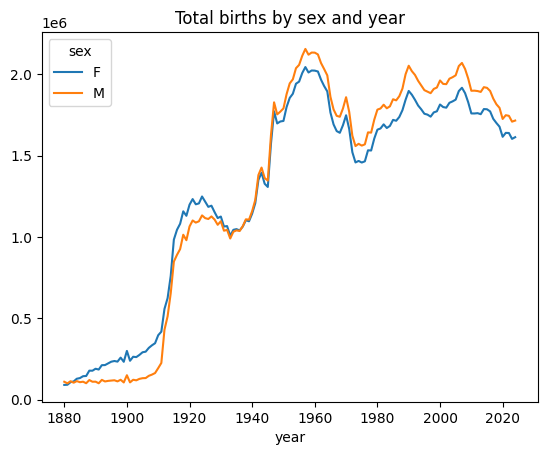

In [83]:
total_births.plot(title="Total births by sex and year")

In [84]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group

In [85]:
#names = names.groupby(["year", "sex"]).apply(add_prop)
names = names.groupby(["year", "sex"]).apply(add_prop).reset_index(drop=False)

In [86]:
names

,year,sex,level_2,name,births,prop
0,1880,F,0,Mary,7065,0.077643
1,1880,F,1,Anna,2604,0.028618
2,1880,F,2,Emma,2003,0.022013
3,1880,F,3,Elizabeth,1939,0.021309
4,1880,F,4,Minnie,1746,0.019188
...,...,...,...,...,...,...
2147624,2024,M,2147624,Zylyn,5,0.000003
2147625,2024,M,2147625,Zymiere,5,0.000003
2147626,2024,M,2147626,Zypher,5,0.000003
2147627,2024,M,2147627,Zyre,5,0.000003


In [87]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2022  M      1.0
2023  F      1.0
      M      1.0
2024  F      1.0
      M      1.0
Name: prop, Length: 290, dtype: float64

In [88]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

level_2       name  births      prop
year sex                                        
1880 F   0        0       Mary    7065  0.077643
         1        1       Anna    2604  0.028618
         2        2       Emma    2003  0.022013
         3        3  Elizabeth    1939  0.021309
         4        4     Minnie    1746  0.019188

In [89]:
top1000 = top1000.reset_index(drop=True)

In [90]:
top1000.head()

,level_2,name,births,prop
0,0,Mary,7065,0.077643
1,1,Anna,2604,0.028618
2,2,Emma,2003,0.022013
3,3,Elizabeth,1939,0.021309
4,4,Minnie,1746,0.019188


In [96]:
import pandas as pd

# 1. Load all data
pieces = []
for year in range(1880, 2025):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])
    frame["year"] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)

# 2. Add prop column using transform (keeps year and sex as columns)
names["prop"] = names.groupby(["year","sex"])["births"].transform(lambda x: x / x.sum())

# 3. Get top 1000 per year/sex using groupby + head after sort
top1000 = (
    names.sort_values(["year","sex","births"], ascending=[True, True, False])
         .groupby(["year","sex"])
         .head(1000)
         .reset_index(drop=True)
)

print(top1000.head())

        name sex  births  year      prop
0       Mary   F    7065  1880  0.077643
1       Anna   F    2604  1880  0.028618
2       Emma   F    2003  1880  0.022013
3  Elizabeth   F    1939  1880  0.021309
4     Minnie   F    1746  1880  0.019188


In [97]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

In [98]:
total_births = top1000.pivot_table("births", index="year", columns="name", aggfunc=sum)

In [99]:
total_births.info()

<class 'pandas.DataFrame'>
Index: 145 entries, 1880 to 2024
Columns: 7389 entries, Aaden to Zyon
dtypes: float64(7389)
memory usage: 8.2 MB


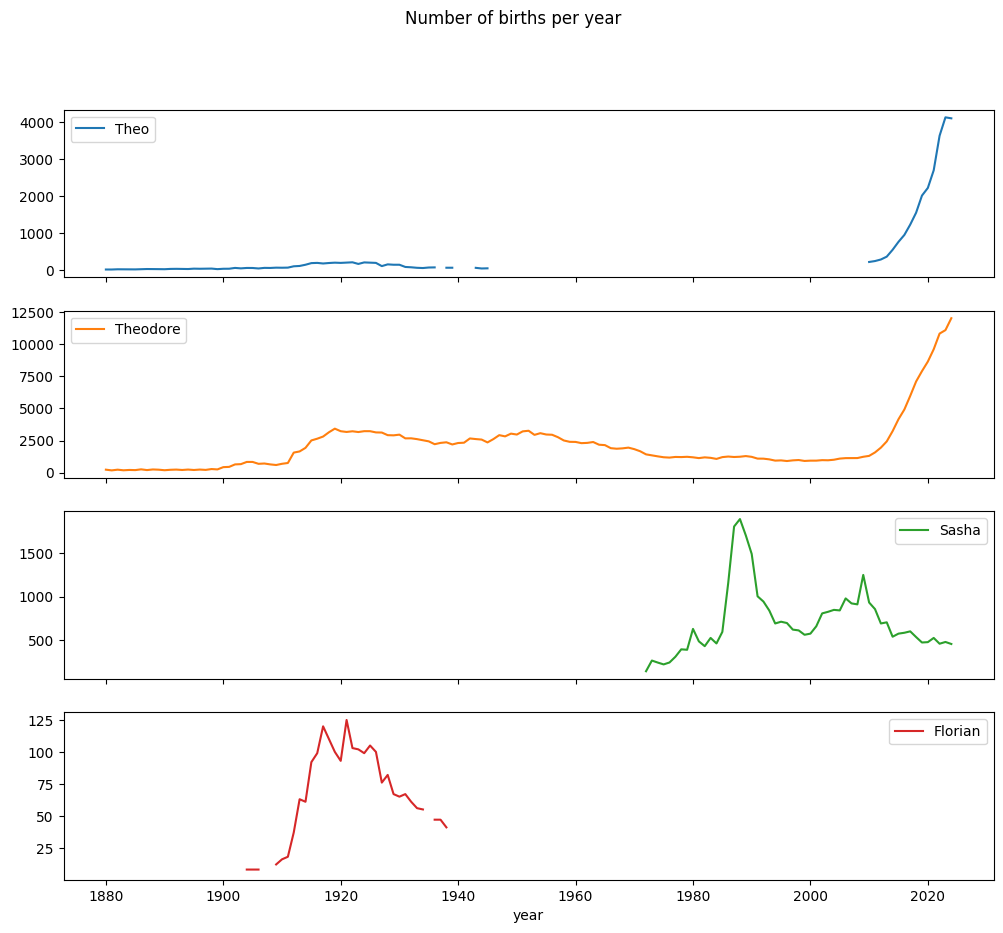

In [125]:
subset = total_births[["Theo", "Theodore", "Sasha", "Florian"]]
subset.plot(subplots=True, figsize=(12, 10), title="Number of births per year");

In [111]:
table = top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)

<Axes: title={'center': 'sum of table1000.prop by year and sex'}, xlabel='year'>

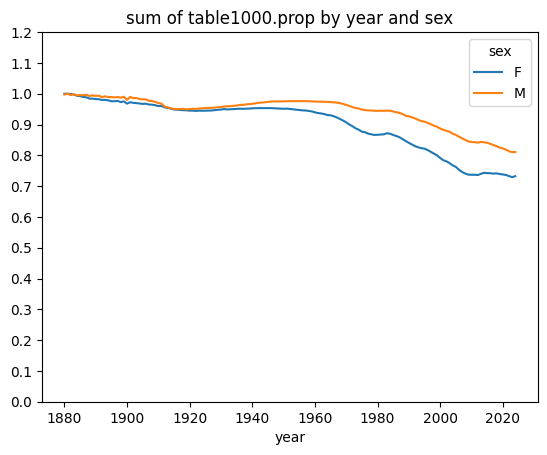

In [112]:
table.plot(title="sum of table1000.prop by year and sex", yticks=np.linspace(0,1.2,13))

In [115]:
df = boys[boys["year"] == 2024]
df

,name,sex,births,year,prop
288877,Liam,M,22164,2024,0.012921
288878,Noah,M,20337,2024,0.011856
288879,Oliver,M,15343,2024,0.008945
288880,Theodore,M,12011,2024,0.007002
288881,James,M,11793,2024,0.006875
...,...,...,...,...,...
289872,Vance,M,226,2024,0.000132
289873,Aden,M,225,2024,0.000131
289874,Ishaan,M,225,2024,0.000131
289875,Kace,M,225,2024,0.000131


In [117]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()

In [118]:
prop_cumsum[:10]

288877    0.012921
288878    0.024777
288879    0.033722
288880    0.040724
288881    0.047599
288882    0.054331
288883    0.060920
288884    0.067433
288885    0.073672
288886    0.079850
Name: prop, dtype: float64

In [119]:
prop_cumsum.searchsorted(0.5)

np.int64(177)

In [120]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

np.int64(25)

In [122]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

In [126]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

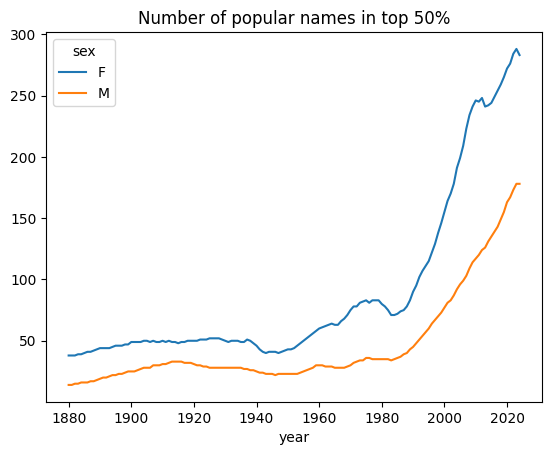

In [128]:
diversity.plot(title="Number of popular names in top 50%")

In [129]:
def get_last_letter(x):
    return x[-1]

In [130]:
last_letters = names["name"].map(get_last_letter)

In [132]:
last_letters.name = "last_letters"
table = names.pivot_table("births", index=last_letters, columns=["sex", "year"], aggfunc=sum)

In [138]:
subtable = table.reindex(columns=[1910, 1960, 2000, 2020], level="year")

In [139]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2000    1813960.0
     2020    1615512.0
M    1910     194198.0
     1960    2132588.0
     2000    1961702.0
     2020    1725065.0
dtype: float64

In [140]:
letter_prop = subtable /subtable.sum()

In [141]:
letter_prop

sex                  F                                       M            \
year              1910      1960      2000      2020      1910      1960   
last_letters                                                               
a             0.273390  0.341853  0.372381  0.381932  0.005031  0.002440   
b                  NaN  0.000343  0.000205  0.000328  0.002116  0.001834   
c             0.000013  0.000024  0.000289  0.000560  0.002482  0.007257   
d             0.017028  0.001844  0.002415  0.002373  0.113858  0.122908   
e             0.336941  0.215133  0.175417  0.177208  0.147556  0.083853   
f                  NaN  0.000010  0.000015  0.000100  0.000783  0.004325   
g             0.000144  0.000157  0.000322  0.000442  0.002250  0.009488   
h             0.051529  0.036224  0.064617  0.069276  0.045562  0.037907   
i             0.001526  0.039965  0.023460  0.047720  0.000844  0.000603   
j                  NaN       NaN  0.000054  0.000088       NaN       NaN   
k             0.000121  0.000156  0.000319  0.000363  0.036581  0.049384   
l             0.043189  0.033867  0.031190  0.021250  0.065016  0.104904   
m             0.001201  0.008613  0.002100  0.004163  0.058044  0.033827   
n             0.079240  0.130687  0.136916  0.113880  0.143415  0.152522   
o             0.001660  0.002439  0.001212  0.002168  0.017065  0.012829   
p             0.000018  0.000023  0.000022  0.000095  0.003172  0.005675   
q                  NaN       NaN       NaN  0.000043       NaN       NaN   
r             0.013390  0.006764  0.027979  0.033259  0.064481  0.031034   
s             0.039042  0.012764  0.017965  0.011791  0.130815  0.102730   
t             0.027438  0.015201  0.005397  0.014743  0.072879  0.065655   
u             0.000684  0.000574  0.000264  0.000670  0.000124  0.000057   
v                  NaN  0.000060  0.000023  0.000293  0.000113  0.000037   
w             0.000020  0.000031  0.000468  0.004173  0.006329  0.007711   
x             0.000015  0.000037  0.000406  0.002098  0.003965  0.001851   
y             0.110972  0.152569  0.135720  0.110325  0.077349  0.160987   
z             0.002439  0.000659  0.000845  0.000659  0.000170  0.000184   

sex                               
year              2000      2020  
last_letters                      
a             0.020817  0.019684  
b             0.025943  0.010525  
c             0.013763  0.009692  
d             0.032753  0.022619  
e             0.075863  0.067769  
f             0.000874  0.001580  
g             0.001223  0.002674  
h             0.043346  0.054649  
i             0.009339  0.032518  
j             0.000468  0.000848  
k             0.022692  0.020385  
l             0.079158  0.065389  
m             0.021120  0.032876  
n             0.313060  0.314531  
o             0.041046  0.060080  
p             0.001810  0.001512  
q             0.000357  0.000192  
r             0.086394  0.095155  
s             0.074360  0.077956  
t             0.025833  0.032786  
u             0.000916  0.003373  
v             0.000501  0.001694  
w             0.028417  0.009997  
x             0.005446  0.011671  
y             0.073000  0.047835  
z             0.001502  0.002009

<Axes: title={'center': 'Female'}, xlabel='last_letters'>

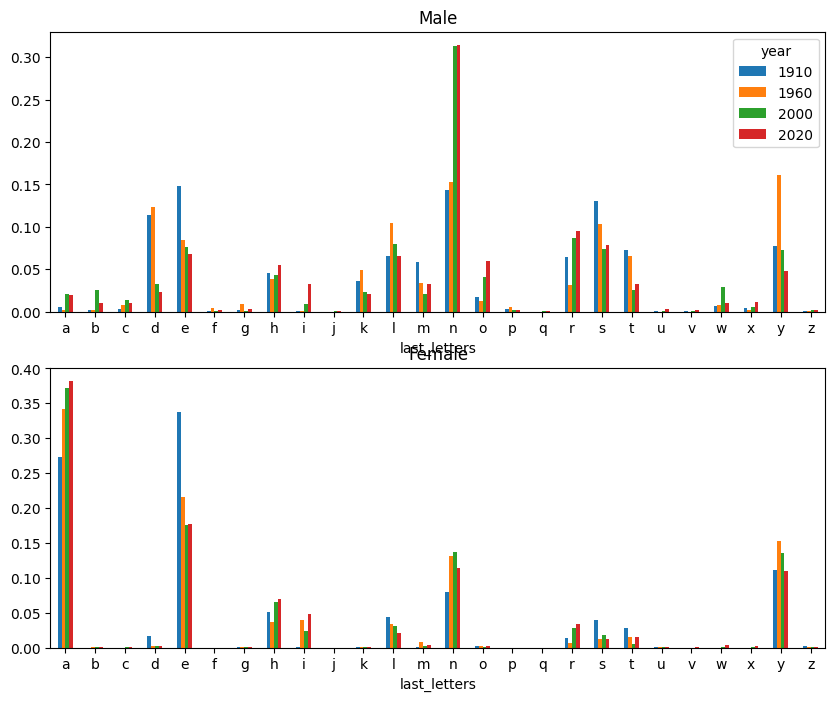

In [142]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
legend=False)

In [143]:
letter_prop = table / table.sum()

In [144]:
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T

In [145]:
dny_ts.head()

last_letters,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<Axes: xlabel='year'>

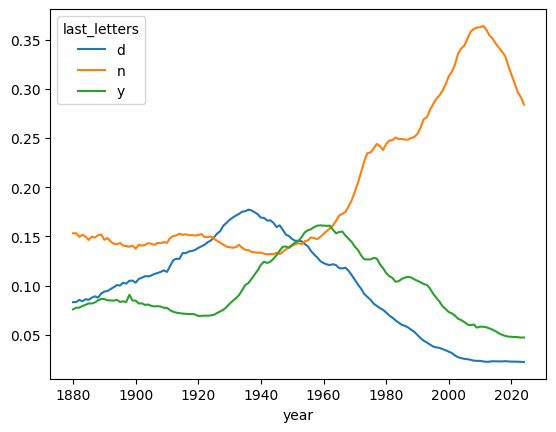

In [146]:
dny_ts.plot()

In [153]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Jesse")]
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Jesse       437778
Jessee          11
Jessenia      1390
Name: births, dtype: int64

In [154]:
table = filtered.pivot_table("births", index="year",
 columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")

<Axes: xlabel='year'>

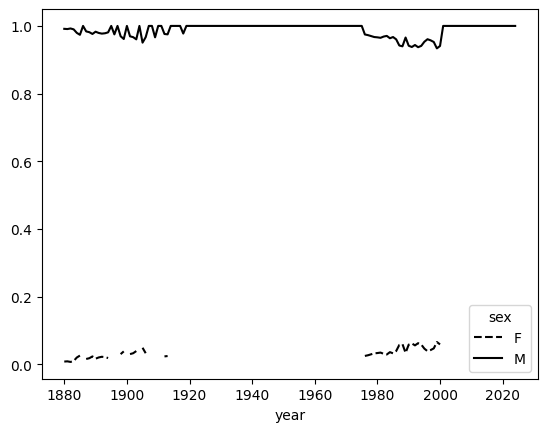

In [155]:
table.plot(style={"M": "k-", "F": "k--"})